Plot neurons:   0%|          | 0/5 [00:00<?, ?it/s]

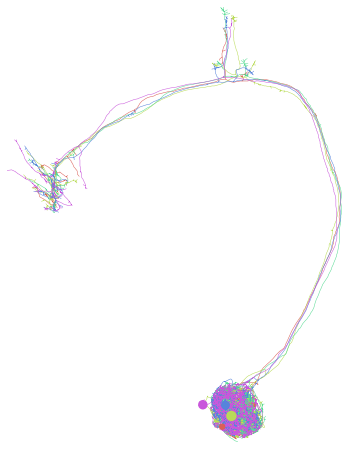

In [1]:
import navis
import matplotlib.pyplot as plt

nl = navis.example_neurons(kind='skeleton')

# Plot using default settings
fig, ax = nl.plot2d(method='2d', view=('x', '-y'))
plt.show()

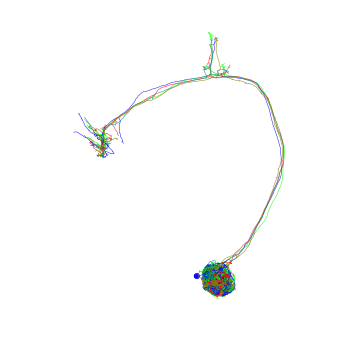

In [4]:
# Plot using matplotlib's 3D capabilities
fig, ax = nl.plot2d(method='3d_complex')
# For 3D plots you can use `azim` (azimuth) and `elev` (elevation) to change view
ax.azim = -90
ax.elev = -90
# Zoom in a bit
ax.dist = 6
plt.show()

```Python
# Render 3D rotation
for i in range(0, 360, 10):
   # Change rotation
   ax.azim = i
   # Save each incremental rotation as frame
   plt.savefig('frame_{0}.png'.format(i), dpi=200)
```

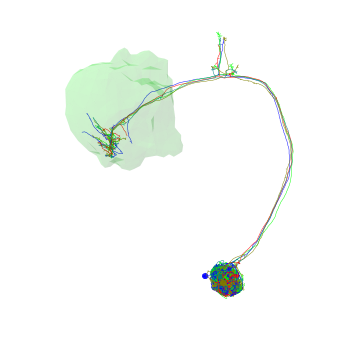

In [7]:
# Retrieve volume
lh = navis.example_volume('LH')
# Set color and alpha
lh.color = (0, 1, 0, .1)
# Plot
fig, ax = navis.plot2d([nl ,lh], method='3d_complex')
ax.elev = ax.azim = -90
ax.dist = 6
plt.show()

```python
# Plot using Vispy (will open 3D viewer)
viewer = nl.plot3d(backend='vispy')
# Save screenshot
viewer.screenshot('screenshot.png', alpha=True)
```

```python
# Clear existing viewer
navis.close3d()

# Add neurons to viewer
navis.plot3d(nl, backend='vispy')

# Add volume
navis.plot3d(lh, backend='vispy')

# Clear viewer again...
navis.clear3d()

# ... or close altogether
navis.close3d()
```

```python
# Open 2 viewers
v1 = navis.Viewer()
v2 = navis.Viewer()

# Add neurons to each one separately
v1.add(nl[0])
v2.add(nl[1])

# Clear first viewer
v1.clear()

# Close the second viewer
v2.close()
```

```python
v = navis.get_viewer()
```

In [ ]:
# Using plotly as backend generates "inline" plots by default (i.e. they are rendered right away)
fig = nl.plot3d(backend='plotly', connectors=False, width=1400)

```python
import plotly 

# Prevent inline plotting
fig = nl.plot3d(backend='plotly', connectors=False, width=1400, height=1000, plotly_inline=False)

# Save figure to html file
plotly.offline.plot(fig, filename='~/Documents/3d_plot.html')
```

In [ ]:
ml = navis.example_neurons(kind='mesh')
fig = ml.plot3d(backend='plotly', connectors=False, width=1400)

In [ ]:
# Provide colors
vols = [navis.example_volume('LH'),
        navis.example_volume('neuropil')]
fig = navis.plot3d([nl, *vols], backend='plotly', width=1200)

In [ ]:
cust_vol = navis.Volume(vertices=[[1, 2, 1],
                                  [5, 6, 7],
                                  [8, 6, 4]],
                         faces=[(0, 1, 2)],
                         name='custom volume',
                         color=(255, 0, 0))
fig = navis.plot3d(cust_vol, backend='plotly', width=1200)

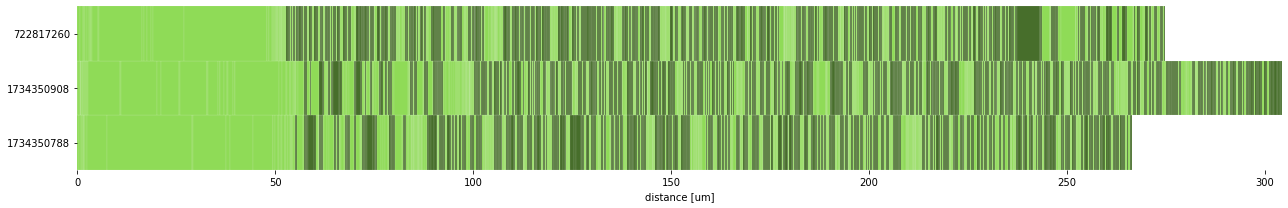

In [9]:
fig, ax = plt.subplots(figsize=(18, 3))

ax = navis.plot1d(nl[:3], ax=ax)

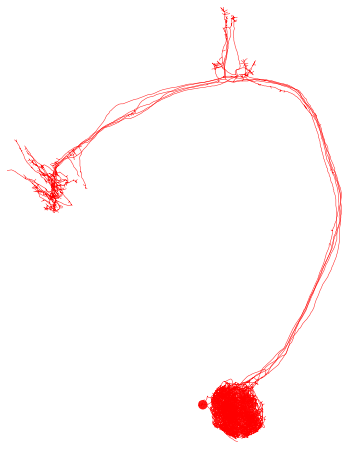

In [10]:
fig, ax = navis.plot2d(nl, color=(1, 0, 0), method='2d', view=('x', '-y'))

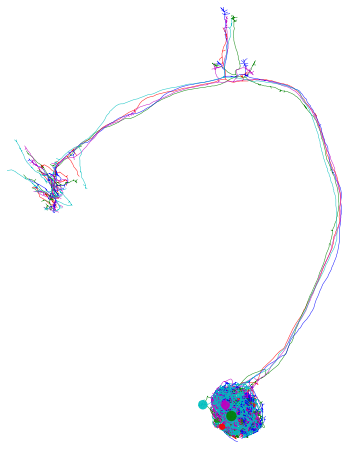

In [11]:
fig, ax = navis.plot2d(nl, color=['r', 'g', 'b', 'm', 'c'], method='2d', view=('x', '-y'))

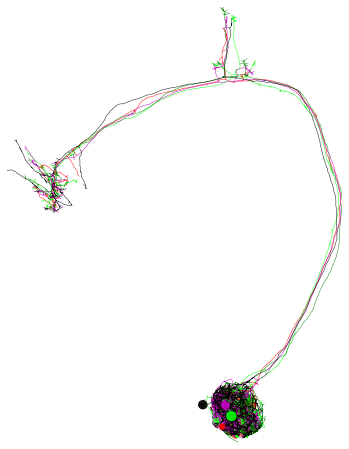

In [12]:
cmap = {nl[0]: 'r',
        nl[1].id: (0, 1, 0),
        nl[2].name: 'g',
        nl[3]: 'm',
        nl[4]: 'k'}

fig, ax = navis.plot2d(nl, color=cmap, method='2d', view=('x', '-y'))

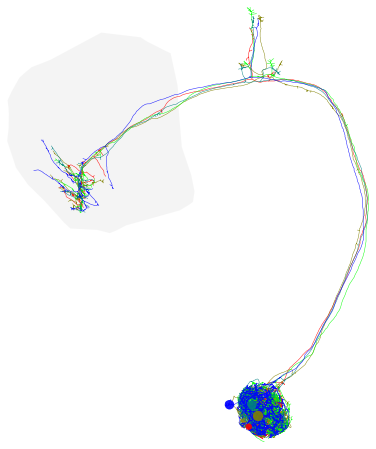

In [10]:
lh = navis.example_volume('LH')
lh.color = (.8, .8, .8, .2)

fig, ax = navis.plot2d([nl, lh], method='2d', view=('x', '-y'))

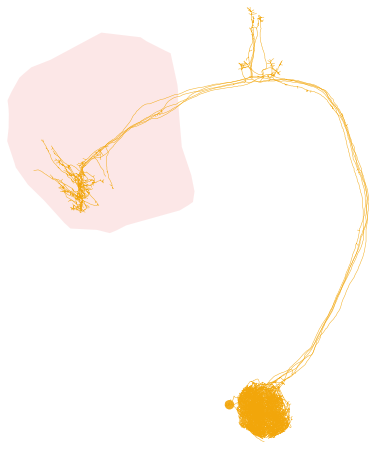

In [14]:
lh = navis.example_volume('LH')

fig, ax = navis.plot2d([nl, lh], colors={lh: (.9, .1, .1, .1)}, method='2d', view=('x', '-y'))

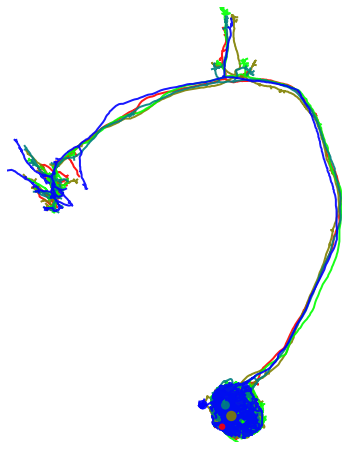

In [15]:
fig, ax = navis.plot2d(nl, linewidth=2, method='2d', view=('x', '-y'))

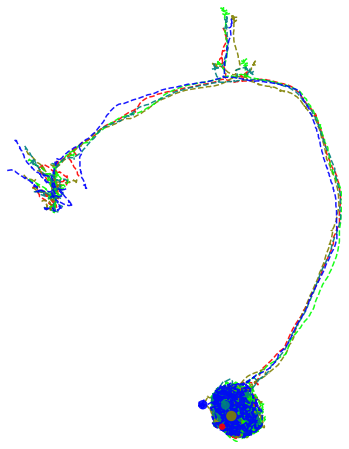

In [16]:
fig, ax = navis.plot2d(nl, linewidth=1.5, linestyle='--', method='2d', view=('x', '-y'))

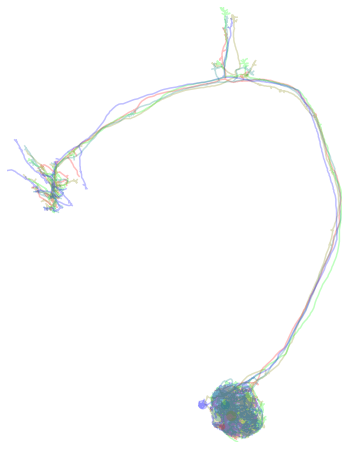

In [17]:
fig, ax = navis.plot2d(nl, linewidth=1.5, alpha=.25, method='2d', view=('x', '-y'))

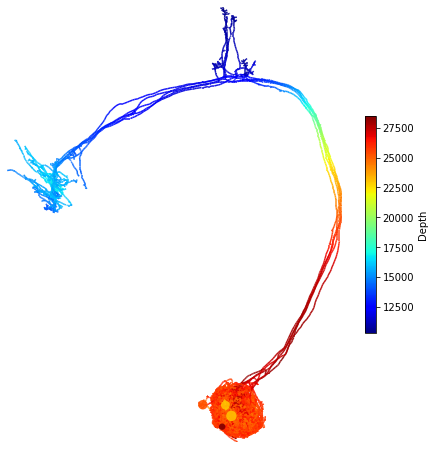

In [7]:
fig, ax = navis.plot2d(nl, method='2d',
                       linewidth=1.5,
                       depth_coloring=True, view=('x', '-y'))

plt.show()

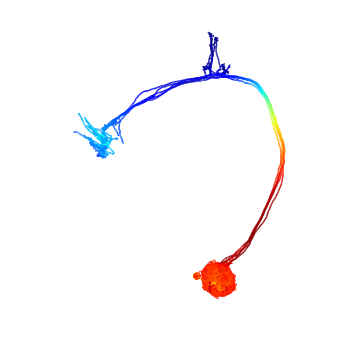

In [4]:
fig, ax = navis.plot2d(nl, method='3d',
                       connectors=False,
                       linewidth=1.5,
                       depth_coloring=True)

# Rotate to top view
ax.elev = ax.azim = -90

# Zoom in a bit
ax.dist = 6

plt.show()

In [3]:
# Fist calculate Strahler indices 
n = nl[0].reroot(nl[0].soma)
navis.strahler_index(n)

# Note the new column in the node table
n.nodes.head()

,node_id,label,x,y,z,radius,parent_id,type,strahler_index
0,1,0,15784.0,37250.0,28062.0,10.000000,2,end,1
1,2,0,15764.0,37230.0,28082.0,18.284300,3,slab,1
2,3,0,15744.0,37190.0,28122.0,34.721401,4,slab,1
3,4,0,15744.0,37150.0,28202.0,34.721401,5,slab,1
4,5,0,15704.0,37130.0,28242.0,34.721401,6,slab,1


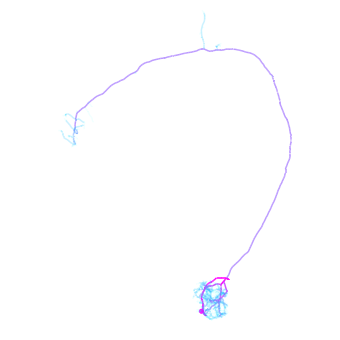

In [13]:
fig, ax = navis.plot2d(n, method='3d',
                       color_by='strahler_index',  # color based on Strahler index column
                       shade_by='strahler_index',  # shade (alpha) based on Strahler index column
                       palette='cool',             # accepts any matplotlib palette
                       linewidth=1.5)

ax.elev = ax.azim = -90
ax.dist = 6
plt.show()

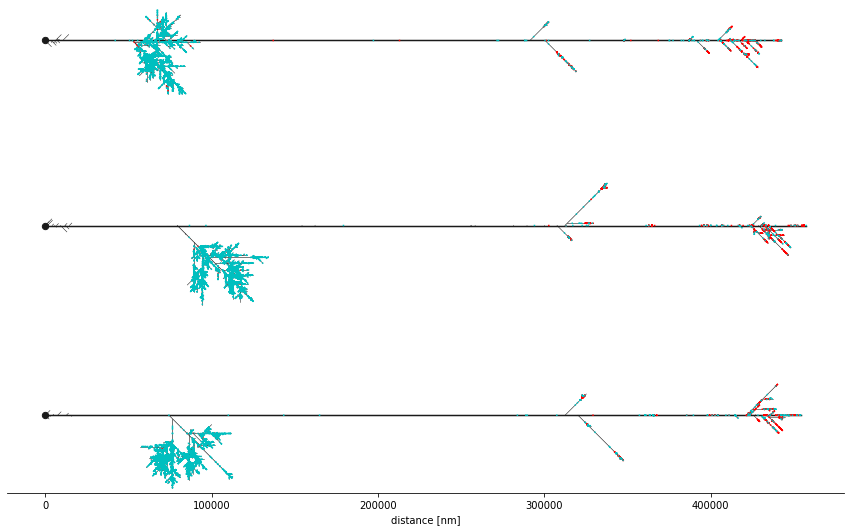

In [33]:
# Convert example neurons from voxels to nanometers
nl_nm = nl.convert_units('nm')

# Reroot to soma
nl_nm[nl_nm.soma != None].reroot(nl_nm[nl_nm.soma != None].soma, inplace=True)

# Generate one axis for each neuron
fig, axes = plt.subplots(3, 1, figsize=(15, 10), sharex=True)

navis.plot_flat(nl_nm[0], layout='subway', plot_connectors=True, ax=axes[0])
navis.plot_flat(nl_nm[1], layout='subway', plot_connectors=True, ax=axes[1])
navis.plot_flat(nl_nm[3], layout='subway', plot_connectors=True, ax=axes[2])

# Clean up the axes
for ax in axes[:-1]:
    ax.set_axis_off()

for sp in ['left', 'right', 'top']:
    axes[-1].spines[sp].set_visible(False)
axes[-1].set_yticks([])

_ = axes[-1].set_xlabel('distance [nm]')
plt.show()

INFO  : Calculating node positions. (navis)
INFO  : Plotting tree. (navis)


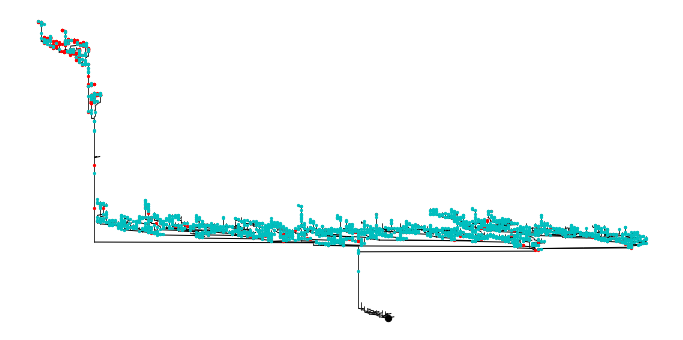

In [36]:
ax = navis.plot_flat(nl_nm[0], layout='dot', plot_connectors=True)
plt.show()

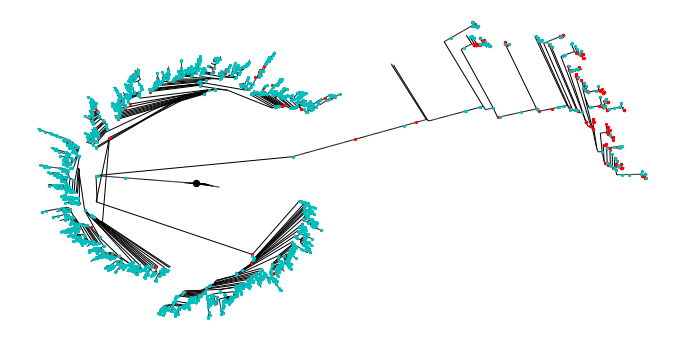

In [25]:
ax = navis.plot_flat(n, layout='twopi', plot_connectors=True)
plt.show()

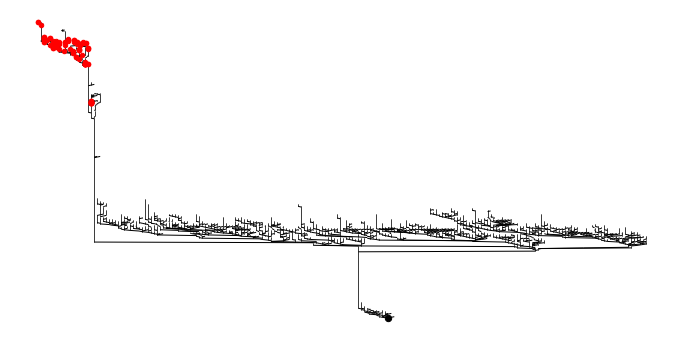

In [23]:
n = nl_nm[0]
highlight = n.connectors.connector_id[:100]

ax = navis.plot_flat(nl_nm[0], layout='dot', highlight_connectors=highlight,
                     syn_marker_size=2)
plt.show()

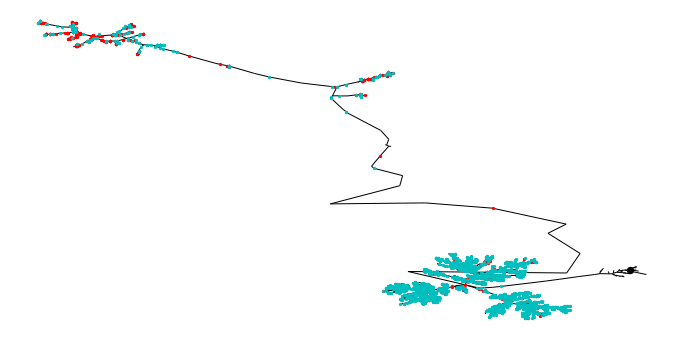

In [20]:
# Some layouts (like "neato" & "fdp") can be quite expensive to calculate in which case it's worth
# downsampling your neuron before plotting
ds = navis.downsample_neuron(nl_nm[0], 10, preserve_nodes='connectors')

ax = navis.plot_flat(ds, layout='neato', plot_connectors=True)
plt.show()

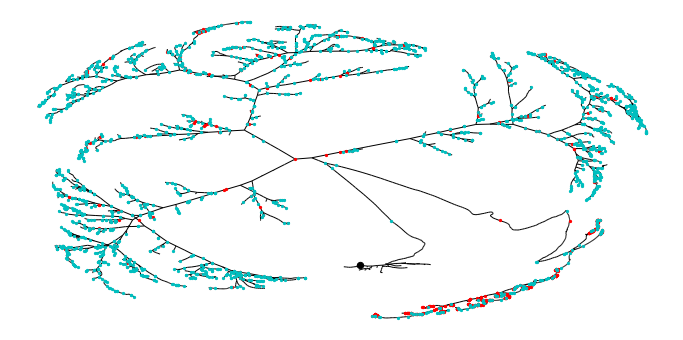

In [21]:
ax = navis.plot_flat(nl[0], layout='sfdp', plot_connectors=True)
plt.show()